**Name**:
In this note book we will see how many VIIRS fires are detected and we will count them as well 

**Description**:  
In this notebook we will use VIIRS fire pixels  to see how many fires We have in a GOES image and we will count them as well. 

**Date created**:  
`2024-12-16`

**Author**:  
Asaf Vanunu

---

In [9]:
import os
import pandas as pd
import rioxarray
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import GOES_VIIRS_tools
import rasterio
import geopandas as gpd

- Let's read our DF

In [2]:
csv_path = [os.path.join(os.getcwd(), f) for f in os.listdir(os.getcwd()) if f.endswith(".csv")][0]
print(csv_path)

c:\Users\asaf_rs\Dropbox\Fire_Detection\python_ML_project\create_ML_df\NC_VIIRS_df.csv


In [3]:
df = pd.read_csv(csv_path)
df[:5]

,GOES_file_name,GOES_date_time,MCMI,FDC,ACM,VIIRS_file,VIIRS_file_full_path
0,s202201010731.nc,2022-01-01 07:31,F:\ML_project\GOES_16\MCMI\OR_ABI-L2-MCMIPC-M6...,F:\ML_project\GOES_16\FDC\OR_ABI-L2-FDCC-M6_G1...,F:\ML_project\GOES_16\ACM\OR_ABI-L2-ACMC-M6_G1...,VNP14IMG.A2022001.0724.002.2024075110909.nc,F:\ML_project\east_us\VIIRS\VIIRS_fire\VNP14IM...
1,s202201010911.nc,2022-01-01 09:11,F:\ML_project\GOES_16\MCMI\OR_ABI-L2-MCMIPC-M6...,F:\ML_project\GOES_16\FDC\OR_ABI-L2-FDCC-M6_G1...,F:\ML_project\GOES_16\ACM\OR_ABI-L2-ACMC-M6_G1...,VNP14IMG.A2022001.0906.002.2024075110907.nc,F:\ML_project\east_us\VIIRS\VIIRS_fire\VNP14IM...
2,s202201011846.nc,2022-01-01 18:46,F:\ML_project\GOES_16\MCMI\OR_ABI-L2-MCMIPC-M6...,F:\ML_project\GOES_16\FDC\OR_ABI-L2-FDCC-M6_G1...,F:\ML_project\GOES_16\ACM\OR_ABI-L2-ACMC-M6_G1...,VNP14IMG.A2022001.1842.002.2024075110906.nc,F:\ML_project\east_us\VIIRS\VIIRS_fire\VNP14IM...
3,s202201012021.nc,2022-01-01 20:21,F:\ML_project\GOES_16\MCMI\OR_ABI-L2-MCMIPC-M6...,F:\ML_project\GOES_16\FDC\OR_ABI-L2-FDCC-M6_G1...,F:\ML_project\GOES_16\ACM\OR_ABI-L2-ACMC-M6_G1...,VNP14IMG.A2022001.2018.002.2024075110907.nc,F:\ML_project\east_us\VIIRS\VIIRS_fire\VNP14IM...
4,s202201012031.nc,2022-01-01 20:31,F:\ML_project\GOES_16\MCMI\OR_ABI-L2-MCMIPC-M6...,F:\ML_project\GOES_16\FDC\OR_ABI-L2-FDCC-M6_G1...,F:\ML_project\GOES_16\ACM\OR_ABI-L2-ACMC-M6_G1...,VNP14IMG.A2022001.2024.002.2024075110907.nc,F:\ML_project\east_us\VIIRS\VIIRS_fire\VNP14IM...


- Now we will read the VIIRS shapefile of both mexico and the east us

In [6]:
main_dir = "F:\\ML_project" ## Here the data is stored
## Get the subdirectories
sub_dir = [os.path.join(main_dir, folder) for folder in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, folder))]
print("Here are the subdirectories: ")
print(sub_dir) 
AOI_list = ["east_us", "mexico"] ## The area of interest


Here are the subdirectories: 
['F:\\ML_project\\brazil', 'F:\\ML_project\\califronia', 'F:\\ML_project\\canada', 'F:\\ML_project\\east_us', 'F:\\ML_project\\GOES_16', 'F:\\ML_project\\mexico', 'F:\\ML_project\\patagonia']


In [7]:
for folder in sub_dir: ## Loop over the subdirectories
    folder_name = os.path.basename(folder) ## Get the base name of the folder for example "east_us"
    if folder_name in AOI_list: ## If the folder name is in the area of interest list
        ## Get the subdirectories of the AOI
        AOI_folders = [os.path.join(folder, sub_folder) for sub_folder in os.listdir(folder) if os.path.isdir(os.path.join(folder, sub_folder))]
        ## Loop over the subdirectories of the AOI
        for sub_folder in AOI_folders:
            if os.path.basename(sub_folder) == "VIIRS": ## If the subdirectory is VIIRS
                VIIRS_dir = sub_folder ## Set the VIIRS directory
                ## Get the subdirectories of the VIIRS directory
                VIIRS_folders = [os.path.join(VIIRS_dir, f) for f in os.listdir(VIIRS_dir) if os.path.isdir(os.path.join(VIIRS_dir, f))]
                ## Loop over the subdirectories of the VIIRS directory
                for VIIRS_folder in VIIRS_folders: ##
                    if os.path.basename(VIIRS_folder) == "VIIRS_points": ## If the subdirectory is VIIRS_points
                        if folder_name == "east_us": ## If the folder name is east_us
                            VIIRS_points_path_east_us = os.path.join(VIIRS_folder, "VIIRS_points.shp") ## Set the VIIRS points path for east US
                        elif folder_name == "mexico": ## If the folder name is mexico
                            VIIRS_points_path_mexico = os.path.join(VIIRS_folder, "VIIRS_points.shp")
                            
print(f"The VIIRS points path for east US is: {VIIRS_points_path_east_us}")
print(f"The VIIRS points path for Mexico is: {VIIRS_points_path_mexico}")

The VIIRS points path for east US is: F:\ML_project\east_us\VIIRS\VIIRS_points\VIIRS_points.shp
The VIIRS points path for Mexico is: F:\ML_project\mexico\VIIRS\VIIRS_points\VIIRS_points.shp


In [10]:
VIIRS_east_us = gpd.read_file(VIIRS_points_path_east_us) ## Read the VIIRS points shapefile for east US
VIIRS_mexico = gpd.read_file(VIIRS_points_path_mexico) ## Read the VIIRS points shape

In [11]:
VIIRS = pd.concat([VIIRS_east_us, VIIRS_mexico], ignore_index=True) ## Concatenate the VIIRS points for east US and Mexico

- Now we will try to use rasterize function to convert VIIRS

In [12]:
random_FDC_path = df["FDC"].iloc[0] ## Get the first FDC value
random_FDC = rioxarray.open_rasterio(random_FDC_path) ## Open the FDC raster
GOES_CRS = random_FDC.rio.crs ## Get the CRS of the FDC raster
print(f"The CRS of the FDC raster is: {GOES_CRS}")

The CRS of the FDC raster is: PROJCS["unnamed",GEOGCS["unknown",DATUM["unnamed",SPHEROID["Spheroid",6378137,298.2572221]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Geostationary_Satellite"],PARAMETER["central_meridian",-75],PARAMETER["satellite_height",35786023],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=geos +lon_0=-75 +h=35786023 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs +sweep=x"]]


- Now we can create a function that returns a df with the amount of VIIRS fires

In [47]:
def number_of_VIIRS_fires(VIIRS_image, VIIRS_shapefile):
    """This function gets a VIIRS image path and returns a df with the number of VIIRS fires

    Args:
        VIIRS_image_path (string): for example 'VNP14IMG.A2022001.0724.002.2024075110909.nc'
        VIIRS_shapefile (GeoDataFrame): The VIIRS shapefile
    """
    Number_of_VIIRS_fire_list = list(range(1,11)) ## List of the number of VIIRS fires
    VIIRS_filtered = VIIRS_shapefile[VIIRS_shapefile["Fire_file"] == VIIRS_image] ## Filter the VIIRS shapefile
    if len(VIIRS_filtered) == 0: ## If there are no VIIRS fires
        print(f"No VIIRS fires for {VIIRS_image}") ## Print a message
        return None ## Return None
    rasterized = GOES_VIIRS_tools.rasterize_fp_nc(image_file=random_FDC_path, filterd_VIIRS=VIIRS_filtered, CRS=GOES_CRS,
                                                  VIIRS_points=0) ## Rasterize the VIIRS shapefile
    value_list = [] ## Create an empty list
    for i in Number_of_VIIRS_fire_list: ## Loop over the number of VIIRS fires
        if i < np.max(Number_of_VIIRS_fire_list): ## If the number of VIIRS fires is less than the max
            value = np.sum(rasterized == i) ## Get the sum of the rasterized image
            value_list.append([str(i), value]) ## Append the value to the list
        else: ## If the number of VIIRS fires is the max
            value = np.sum(rasterized >= i) ## Get the sum of the rasterized image
            value_list.append([f"{i}<=", value])
            
    
    d = {"VIIRS_file":VIIRS_image} ## Create an empty dictionary
    for i in range(len(value_list)): ## Loop over the value list
        d[value_list[i][0]] = value_list[i][1] ## Add the value to the dictionary
        
    df = pd.DataFrame(d, index=[0]) ## Create a dataframe from the dictionary
    
    return df ## Return the dataframe
    
    
        

In [52]:
VIIRS_fires_df_list = [] ## Create an empty list
for i in range(len(df)): ## Loop over the dataframe
    VIIRS_fires_df = number_of_VIIRS_fires(VIIRS_image=df["VIIRS_file"].iloc[i], VIIRS_shapefile=VIIRS) ## Get the number of VIIRS fires
    VIIRS_fires_df_list.append(VIIRS_fires_df) ## Append the dataframe to the list
    print(f"Finished {i+1}/{len(df)}") ## Print a message

Finished 1/4460
Finished 2/4460
Finished 3/4460
Finished 4/4460
Finished 5/4460
Finished 6/4460
Finished 7/4460
Finished 8/4460
Finished 9/4460
Finished 10/4460
Finished 11/4460
Finished 12/4460
Finished 13/4460
Finished 14/4460
Finished 15/4460
Finished 16/4460
Finished 17/4460
Finished 18/4460
Finished 19/4460
Finished 20/4460
Finished 21/4460
Finished 22/4460
Finished 23/4460
Finished 24/4460
Finished 25/4460
Finished 26/4460
Finished 27/4460
Finished 28/4460
Finished 29/4460
Finished 30/4460
Finished 31/4460
Finished 32/4460
Finished 33/4460
Finished 34/4460
Finished 35/4460
Finished 36/4460
Finished 37/4460
Finished 38/4460
Finished 39/4460
Finished 40/4460
Finished 41/4460
Finished 42/4460
Finished 43/4460
Finished 44/4460
Finished 45/4460
Finished 46/4460
Finished 47/4460
Finished 48/4460
Finished 49/4460
Finished 50/4460
Finished 51/4460
Finished 52/4460
Finished 53/4460
Finished 54/4460
Finished 55/4460
Finished 56/4460
Finished 57/4460
Finished 58/4460
Finished 59/4460
Finish

In [53]:
VIIRS_fires_df_concat = pd.concat(VIIRS_fires_df_list, ignore_index=True) ## Concatenate the dataframes

In [64]:
VIIRS_fires_df_concat["Sum"] = VIIRS_fires_df_concat.iloc[:,1:len(VIIRS_fires_df_concat.columns)].sum(axis=1) ## Get the sum of the columns

In [65]:
VIIRS_fires_df_concat

,VIIRS_file,1,2,3,4,5,6,7,8,9,10<=,Sum
0,VNP14IMG.A2022001.0724.002.2024075110909.nc,27,7,1,0,0,0,0,0,0,0,35
1,VNP14IMG.A2022001.0906.002.2024075110907.nc,11,1,0,0,0,0,0,0,0,0,12
2,VNP14IMG.A2022001.1842.002.2024075110906.nc,18,5,0,0,0,0,0,0,1,0,24
3,VNP14IMG.A2022001.2018.002.2024075110907.nc,3,1,1,0,0,0,0,0,0,0,5
4,VNP14IMG.A2022001.2024.002.2024075110907.nc,1,3,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4455,VNP14IMG.A2023365.0754.002.2023365163730.nc,133,18,9,2,2,0,0,0,0,0,164
4456,VNP14IMG.A2023365.0936.002.2023365163731.nc,7,1,0,0,0,0,0,0,0,0,8
4457,VNP14IMG.A2023365.1730.002.2024001010601.nc,6,0,0,0,0,0,0,0,0,0,6
4458,VNP14IMG.A2023365.1912.002.2024001102105.nc,139,37,14,11,0,0,0,0,0,1,202


* Now we can start plotting so we will have sense of the data

In [141]:
df_result = VIIRS_fires_df_concat.select_dtypes(include="number").aggregate(["mean", "std", "max", "sum"]).round(0)
df_result_T = df_result.T.reset_index()
df_result_T

,index,mean,std,max,sum
0,1,34.0,45.0,446.0,153304.0
1,2,8.0,13.0,170.0,35665.0
2,3,2.0,5.0,60.0,10565.0
3,4,1.0,3.0,31.0,5126.0
4,5,1.0,1.0,18.0,2400.0
5,6,0.0,1.0,12.0,1331.0
6,7,0.0,1.0,9.0,785.0
7,8,0.0,0.0,6.0,524.0
8,9,0.0,0.0,5.0,337.0
9,10<=,0.0,1.0,22.0,1005.0


In [142]:
df_result_T["sum"] = df_result_T["sum"].astype(int)

In [143]:
df_result_T = df_result_T.iloc[0:len(df_result_T)-1]

Text(0, 0.5, 'sum in the dataset')

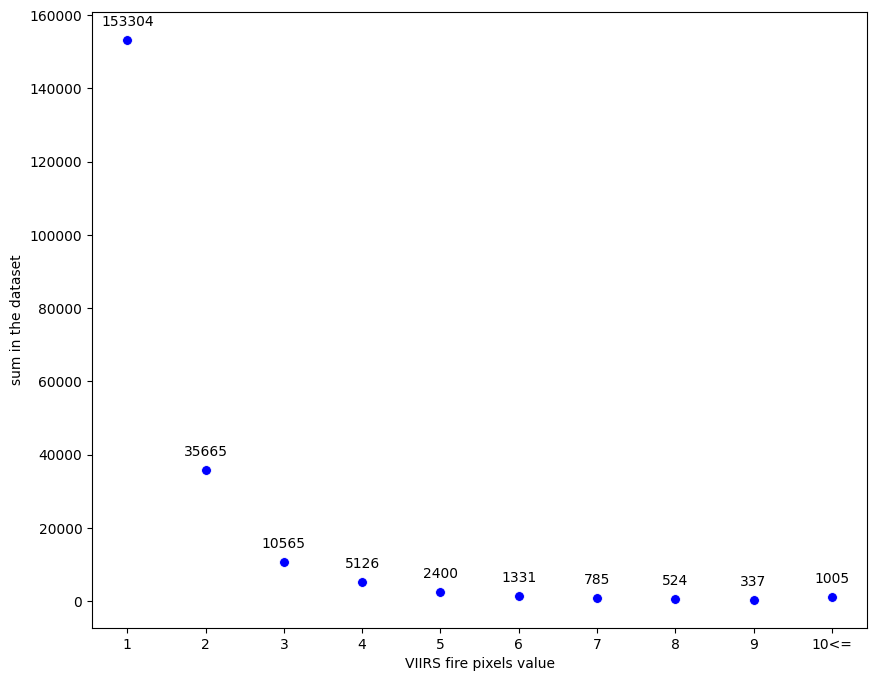

In [145]:
# Set figure size
plt.figure(figsize=(10, 8))  # Width = 10, Height = 6 (in inches)
sns.scatterplot(data=df_result_T , x = "index", y = "sum", s=50, color="blue")
offset = (df_result_T["sum"].max() - df_result_T["sum"].min()) * 0.02  # Offset is 2% of the Y range
# Add annotations for each point
for i in range(len(df_result_T)):
    plt.text(x=df_result_T['index'][i], y=df_result_T['sum'][i] + offset, s=f"{df_result_T['sum'][i]}",
             fontsize=10, color='black', ha='center', va='bottom')

# Add labels and title
plt.xlabel("VIIRS fire pixels value")
plt.ylabel("sum in the dataset")